In [1]:
#LOADING LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import time

In [2]:
os.chdir("C:/Users/michael/Desktop/edWisor/PROJECT/cab fare prediction")

In [3]:
os.getcwd()

'C:\\Users\\michael\\Desktop\\edWisor\\PROJECT\\cab fare prediction'

In [4]:
train = pd.read_csv("train_cab.csv", sep = ',')

In [5]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
type(train)

pandas.core.frame.DataFrame

In [7]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
train.shape

(16067, 7)

In [9]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
######################################## EXPLORATARY DATA ANALYSIS ############################################################

In [10]:
#MISSING VALUE ANALYSIS
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [11]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [13]:
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

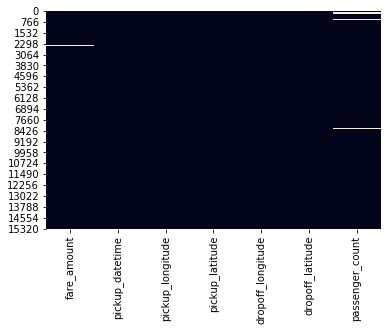

In [14]:
sns.heatmap(train.isnull(), cbar = False)

In [15]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [16]:
train['passenger_count'] = train['passenger_count'].fillna(train['passenger_count'].mean())

In [17]:
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].mean())

In [18]:
train.dropna(subset= ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.00000
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.00000
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.00000
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.00000
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.00000
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.00000
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.00000
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.00000
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.00000


In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce')

In [20]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [21]:
train.dropna(subset = ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.00000
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.00000
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.00000
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.00000
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.00000
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1.00000
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2.00000
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1.00000
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1.00000


In [22]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [23]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [24]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1.00000,2014.0,12.0,12.0,4.0,7.0,41.0
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2.00000,2009.0,7.0,13.0,0.0,7.0,58.0
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1.00000,2009.0,11.0,11.0,2.0,11.0,19.0
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1.00000,2010.0,5.0,11.0,1.0,23.0,53.0
16066,8.5,2011-12-14 06:24:33+00:00,-74.002111,40.729755,-73.983877,40.761975,2.62507,2011.0,12.0,14.0,2.0,6.0,24.0


In [25]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [26]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [27]:
train = train.drop(train[train["passenger_count"]>6].index, axis = 0)

In [28]:
train = train.drop(train[train["passenger_count"]==0].index, axis = 0)

In [29]:
train["passenger_count"].describe()

count    15989.000000
mean         1.652936
std          1.265054
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [30]:
train = train.drop(train[train["passenger_count"]==0.12].index, axis = 0)

In [31]:
train[train['pickup_latitude']>90]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [32]:
train[train['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [33]:
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [34]:
train[train['pickup_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [35]:
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [36]:
train[train['dropoff_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [37]:
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [38]:
train[train['dropoff_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [39]:
train = train.drop(train[train["pickup_latitude"]>90].index, axis = 0)

In [40]:
train.shape

(15987, 13)

In [41]:
#Creating a new variable using haversine function
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [42]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [43]:
train.shape

(15987, 14)

In [44]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [45]:
train['distance'].isnull().sum()

0

In [46]:
train.shape

(15987, 14)

In [47]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [48]:
train.shape

(15987, 8)

In [49]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [50]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [52]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [53]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1f91a555630>,
 'caps': [<matplotlib.lines.Line2D at 0x1f91a555c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f91a555240>],
 'medians': [<matplotlib.lines.Line2D at 0x1f91a555f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f91a55f668>],
 'means': []}

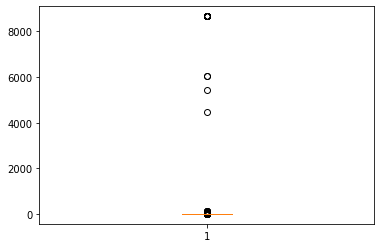

In [54]:
#Outlier Analysis
plt.boxplot(train['distance'])

In [55]:
q75, q25 = np.percentile(train['distance'], [75, 25])

In [56]:
#calculating iqr
iqr = q75-q25
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

In [57]:
#replacing with NA 
train.loc[train['distance']<minimum,:'distance'] = np.nan
train.loc[train['distance']>maximum,:'distance'] = np.nan

In [58]:
train['distance'].isnull().sum()

1381

In [59]:
train['distance'] = train['distance'].fillna(train['distance'].mean())

In [60]:
train['distance'].isnull().sum()

0

In [61]:
train['distance'].describe()

count    15987.000000
mean         2.381528
std          1.609412
min          0.000000
25%          1.214734
50%          2.125365
75%          3.055892
max          7.814298
Name: distance, dtype: float64

In [62]:
train = train.drop(train[train["distance"]==0].index, axis = 0)

In [63]:
train['distance'].describe()

count    15531.000000
mean         2.451451
std          1.579506
min          0.000111
25%          1.277760
50%          2.194831
75%          3.115136
max          7.814298
Name: distance, dtype: float64

In [64]:
train.shape

(15531, 8)

In [65]:
train['fare_amount'].describe()

count    14150.000000
mean        13.379120
std        458.270774
min         -3.000000
25%          5.700000
50%          8.000000
75%         11.000000
max      54343.000000
Name: fare_amount, dtype: float64

In [66]:
train["fare_amount"].sort_values(ascending = False)

1015     54343.0
1072      4343.0
607        453.0
980        434.0
1483       165.0
          ...   
16009        NaN
16013        NaN
16023        NaN
16055        NaN
16063        NaN
Name: fare_amount, Length: 15531, dtype: float64

In [67]:
train['fare_amount'].isnull().sum()

1381

In [68]:
train = train.drop(train[train["fare_amount"]<0].index, axis = 0)

In [69]:
train.shape

(15528, 8)

In [70]:
train = train.drop(train[train["fare_amount"]<1].index, axis = 0)

In [71]:
train.shape

(15526, 8)

In [72]:
train["fare_amount"].sort_values(ascending = False)

1015     54343.0
1072      4343.0
607        453.0
980        434.0
1483       165.0
          ...   
16009        NaN
16013        NaN
16023        NaN
16055        NaN
16063        NaN
Name: fare_amount, Length: 15526, dtype: float64

In [73]:
train['fare_amount'].describe()

count    14145.000000
mean        13.384443
std        458.351680
min          2.500000
25%          5.700000
50%          8.000000
75%         11.000000
max      54343.000000
Name: fare_amount, dtype: float64

In [74]:
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)

In [75]:
train['fare_amount'].isnull().sum()

0

In [76]:
train["fare_amount"].sort_values(ascending = False)

1015     54343.0
1072      4343.0
607        453.0
980        434.0
1483       165.0
          ...   
15370        2.5
6276         2.5
7728         2.5
8795         2.5
4084         2.5
Name: fare_amount, Length: 14145, dtype: float64

In [77]:
train.shape

(14145, 8)

In [78]:
train.isnull().sum()

fare_amount        0
passenger_count    0
year               0
Month              0
Date               0
Day                0
Hour               0
distance           0
dtype: int64

In [79]:
corr = train.corr()
corr

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
fare_amount,1.000000,-0.004548,0.016448,-0.010959,0.010641,0.005248,0.005027,0.023136
passenger_count,-0.004548,1.000000,0.002815,0.013528,0.004880,0.046214,0.021798,0.004113
year,0.016448,0.002815,1.000000,-0.113751,-0.027911,0.005194,-0.003506,0.019130
Month,-0.010959,0.013528,-0.113751,1.000000,-0.019183,-0.020329,-0.003901,0.007501
Date,0.010641,0.004880,-0.027911,-0.019183,1.000000,0.009712,0.004126,-0.012433
Day,0.005248,0.046214,0.005194,-0.020329,0.009712,1.000000,-0.088521,0.030298
Hour,0.005027,0.021798,-0.003506,-0.003901,0.004126,-0.088521,1.000000,-0.028667
distance,0.023136,0.004113,0.019130,0.007501,-0.012433,0.030298,-0.028667,1.000000


In [80]:
train['fare_amount'].describe()

count    14145.000000
mean        13.384443
std        458.351680
min          2.500000
25%          5.700000
50%          8.000000
75%         11.000000
max      54343.000000
Name: fare_amount, dtype: float64

In [81]:
train = train.drop(train[train["fare_amount"]>454].index, axis = 0)

In [82]:
train['fare_amount'].describe()

count    14143.000000
mean         9.236862
std          7.350564
min          2.500000
25%          5.700000
50%          8.000000
75%         11.000000
max        453.000000
Name: fare_amount, dtype: float64

In [83]:
train.shape

(14143, 8)

In [84]:
#chi square test
cat_var = ["passenger_count", "year", "Month", "Date", "Day", "Hour"]

In [85]:
for i in cat_var :
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['fare_amount'], train[i]))
    print(p)

passenger_count
0.9618986010093884
year
0.0
Month
3.0546694546268204e-05
Date
0.7061468629742318
Day
0.4551713150893096
Hour
7.280702835707685e-06


In [86]:
train[train['passenger_count']==1.3]

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance


In [87]:
train[train['distance']==0]

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance


In [88]:
train[train['fare_amount']==0]

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance


In [ ]:
#VISUALIZATIONS

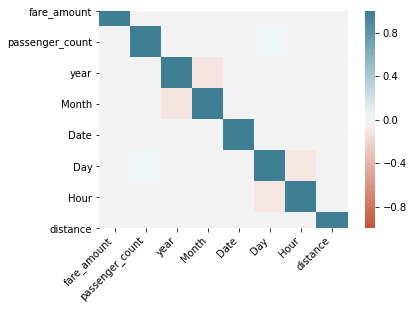

In [89]:
cplot = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
cplot.set_xticklabels(
    cplot.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

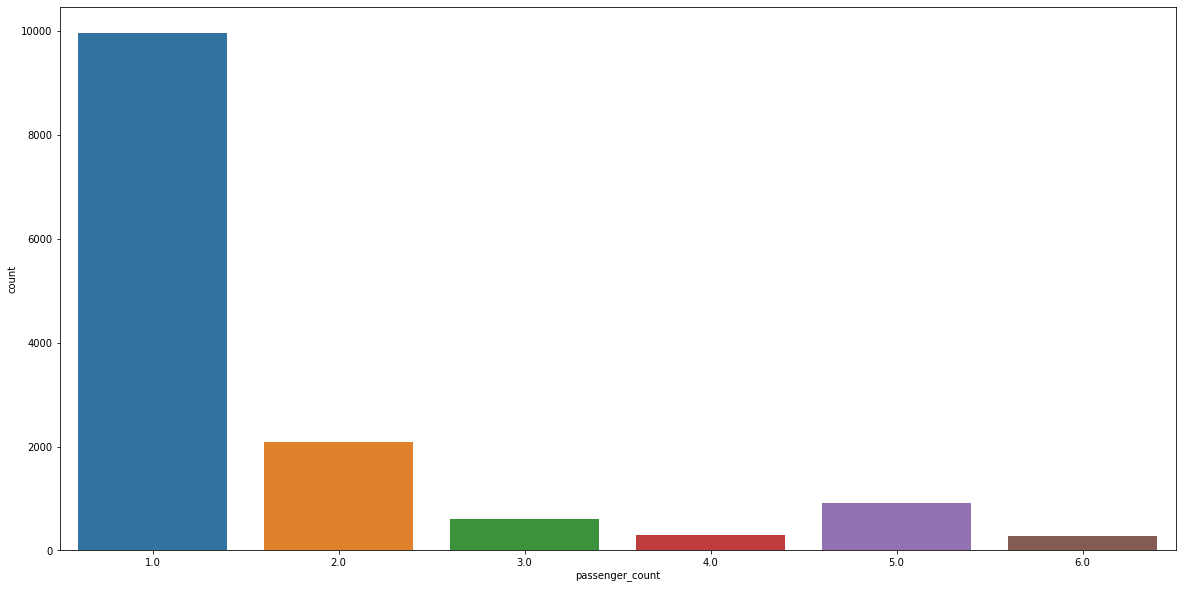

In [90]:
plt.figure(figsize = (20,10))
sns.countplot(x = "passenger_count", data = train)

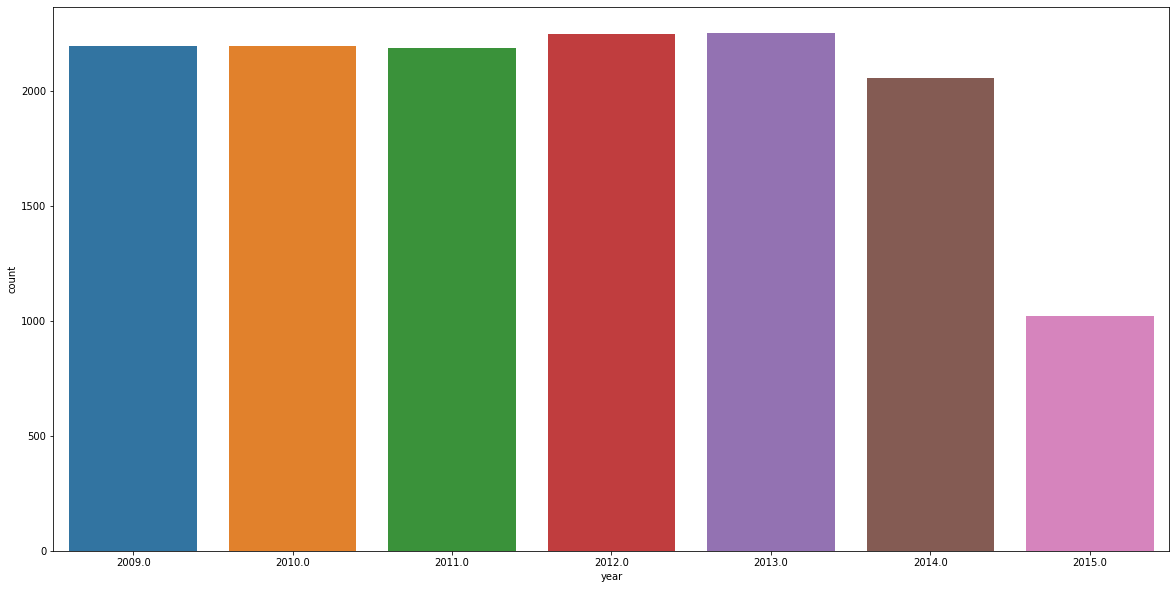

In [91]:
plt.figure(figsize = (20,10))
sns.countplot(x = "year", data = train)

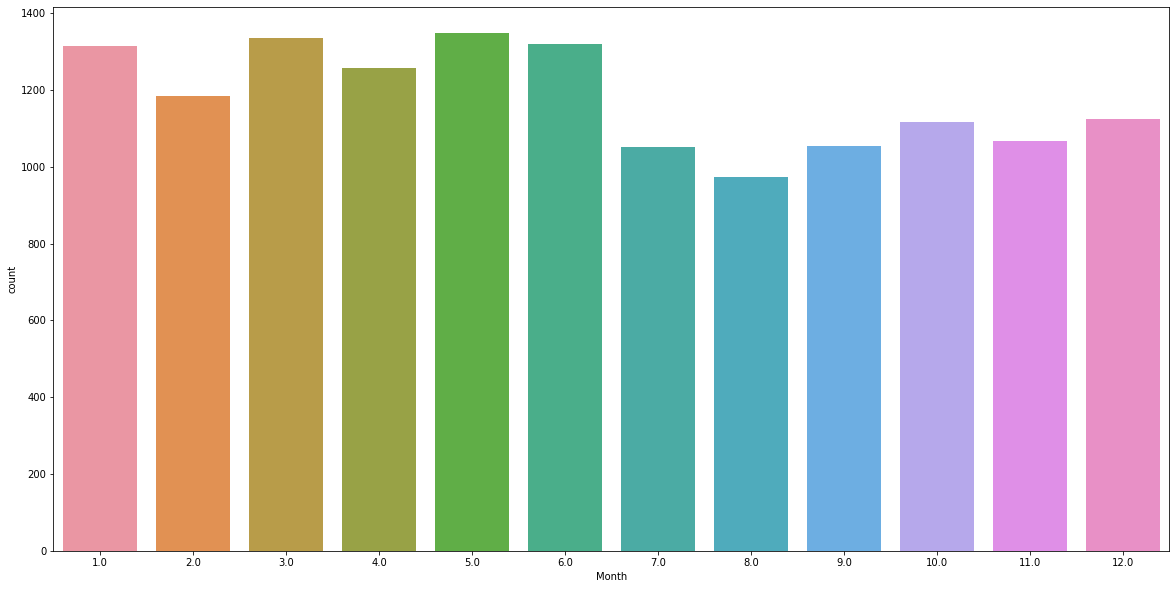

In [92]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Month", data = train)

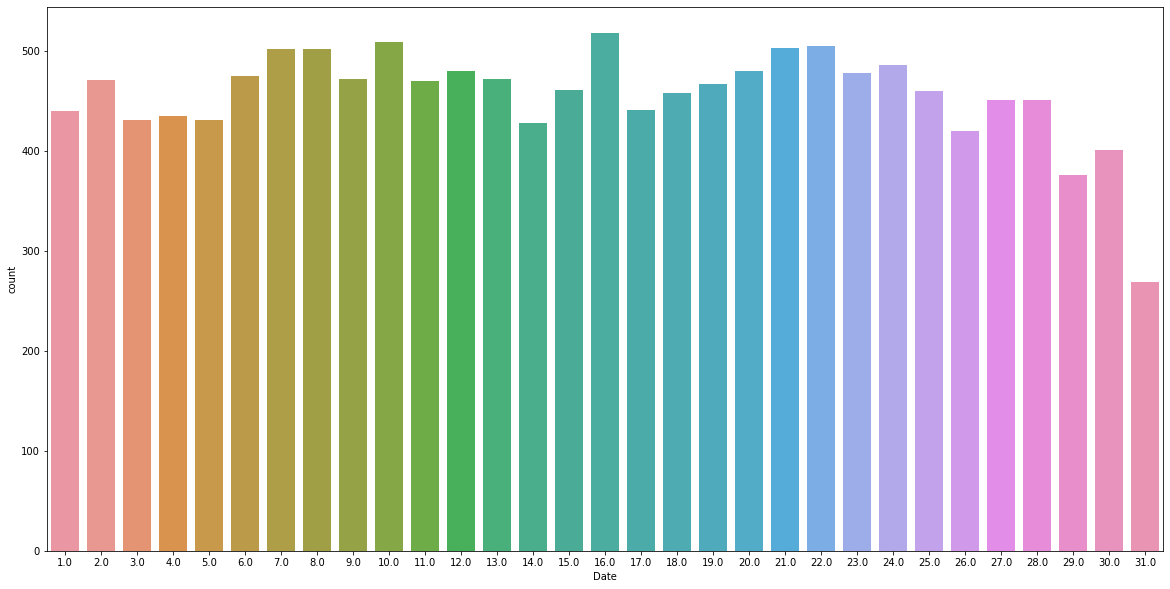

In [93]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Date", data = train)

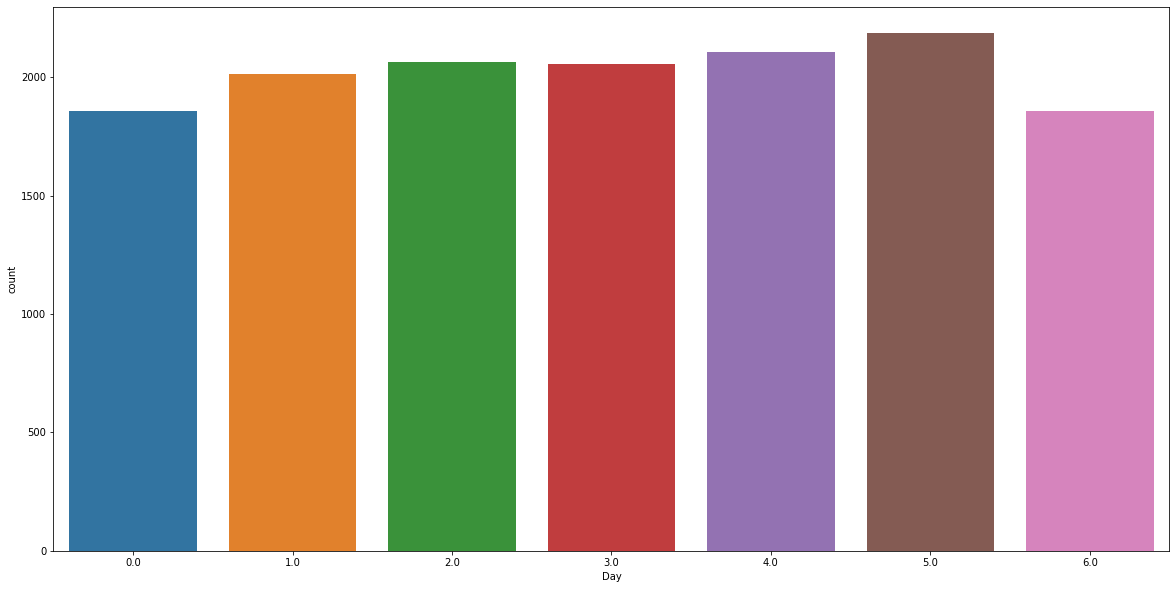

In [94]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Day", data = train)

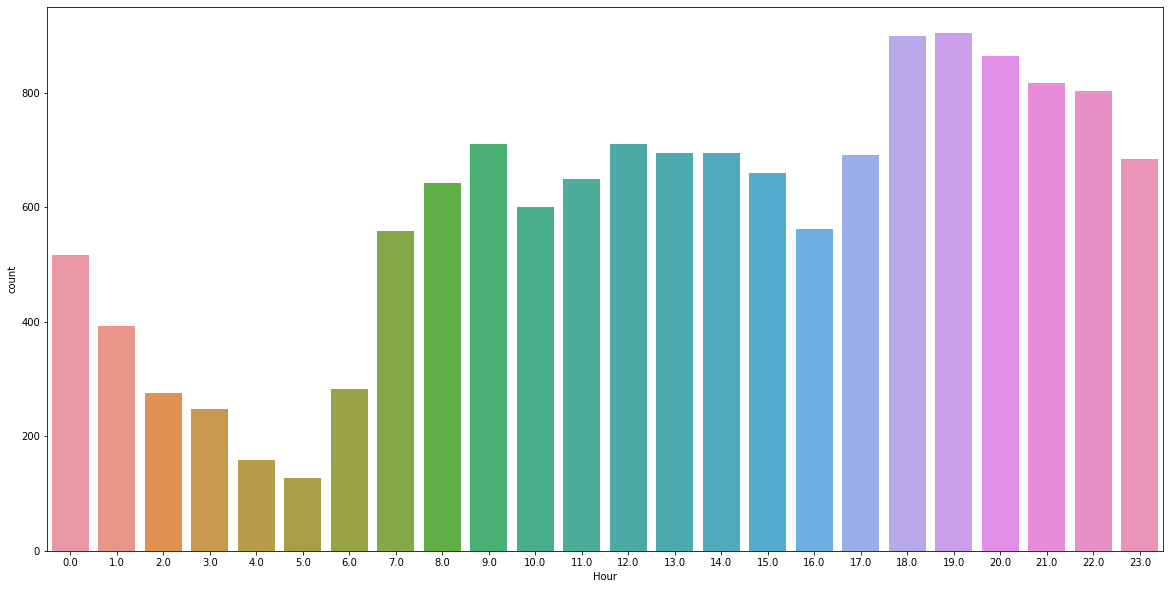

In [95]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Hour", data = train)

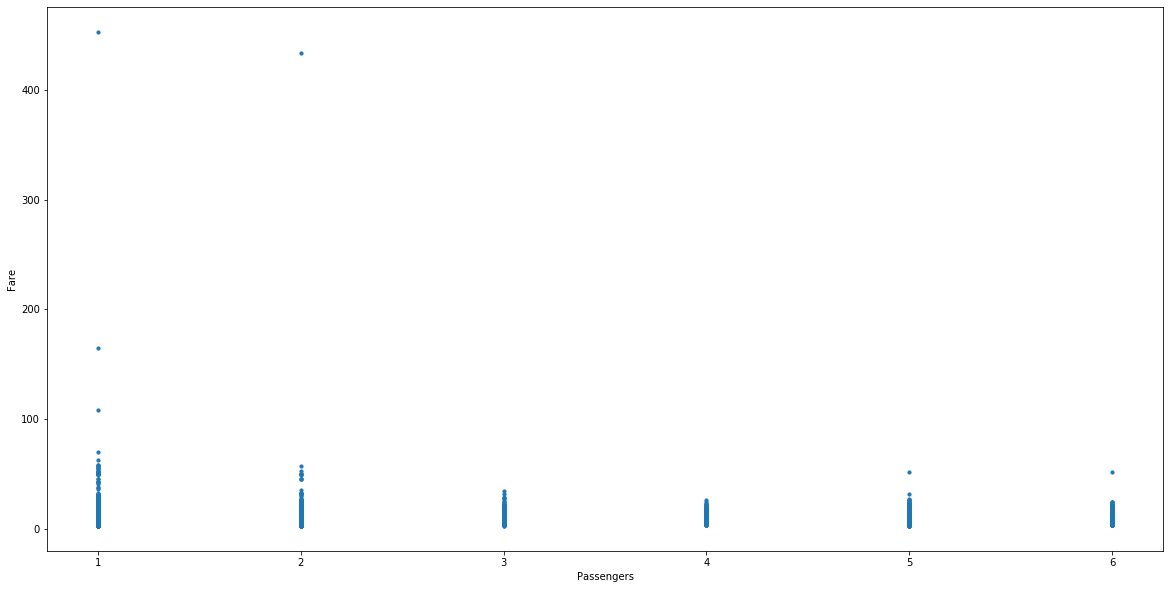

In [96]:
plt.figure(figsize = (20,10))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s = 10)
plt.xlabel('Passengers')
plt.ylabel('Fare')
plt.show()


(array([122., 119., 260., 494., 685., 845., 858., 900., 841., 719., 701.,
        676., 586., 532., 523., 488., 418., 387., 340., 301., 287., 282.,
        227., 217., 192., 191., 190., 152., 156., 143., 151., 101., 111.,
        106.,  88., 108.,  88.,  85.,  79.,  75.,  74.,  45.,  48.,  60.,
         44.,  48.]),
 array([1.11194926e-04, 1.69984829e-01, 3.39858464e-01, 5.09732098e-01,
        6.79605732e-01, 8.49479367e-01, 1.01935300e+00, 1.18922664e+00,
        1.35910027e+00, 1.52897390e+00, 1.69884754e+00, 1.86872117e+00,
        2.03859481e+00, 2.20846844e+00, 2.37834208e+00, 2.54821571e+00,
        2.71808934e+00, 2.88796298e+00, 3.05783661e+00, 3.22771025e+00,
        3.39758388e+00, 3.56745752e+00, 3.73733115e+00, 3.90720478e+00,
        4.07707842e+00, 4.24695205e+00, 4.41682569e+00, 4.58669932e+00,
        4.75657296e+00, 4.92644659e+00, 5.09632022e+00, 5.26619386e+00,
        5.43606749e+00, 5.60594113e+00, 5.77581476e+00, 5.94568840e+00,
        6.11556203e+00, 6.28543567

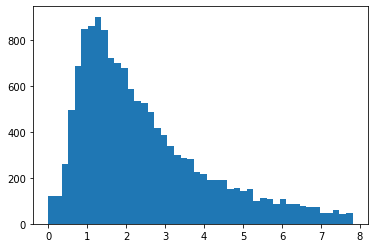

In [97]:
plt.hist(train['distance'], bins = 'auto')

distance


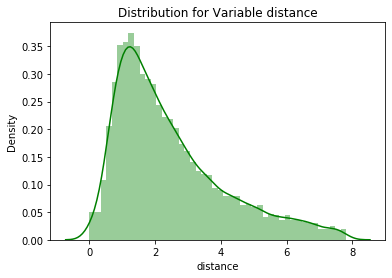

In [98]:
for i in ['distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [99]:
train['distance'] = np.log1p(train['distance'])

distance


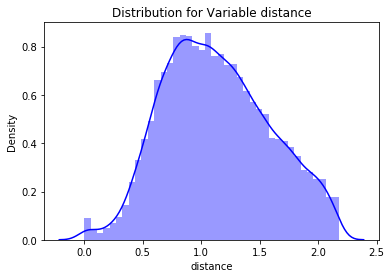

In [100]:
for i in ['distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

fare_amount


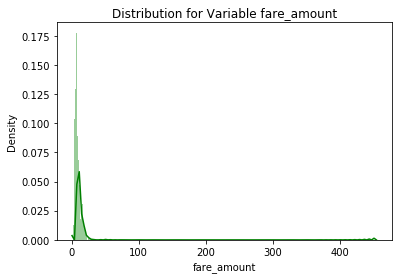

In [101]:
for i in ['fare_amount']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [102]:
train['fare_amount'] = np.log1p(train['fare_amount'])

fare_amount


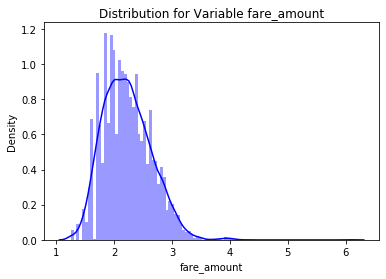

In [103]:
for i in ['fare_amount']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
################################################ MODEL SELECTION #############################################################

In [104]:
#Splitting data into train and test
train_data, test_data = train_test_split(train, test_size = 0.2)

In [105]:
train_data.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
579,2.541602,1.0,2012.0,2.0,24.0,4.0,18.0,1.642112
10120,2.197225,2.0,2014.0,2.0,24.0,0.0,19.0,0.940935
200,1.945910,1.0,2013.0,10.0,5.0,5.0,9.0,0.776532
66,2.251292,4.0,2014.0,1.0,17.0,4.0,9.0,0.748307
8782,2.602690,1.0,2012.0,8.0,9.0,3.0,2.0,1.868816


In [ ]:
#LINEAR REGRESSION

In [106]:
model1 = sm.OLS(train_data.iloc[:,0], train_data.iloc[:,1:7]).fit()

In [107]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          5.352e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                        0.00
Time:                        18:22:38   Log-Likelihood:                         -6181.4
No. Observations:               11314   AIC:                                  1.237e+04
Df Residuals:                   11308   BIC:                                  1.242e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.0044      0.003      1.407      0.159      -0.002       0.010
year                0.0011   7.91e-06    137.960      0.000       0.001       0.001
Month               0.0039      0.001      3.400      0.001       0.002       0.006
Date               -0.0008      0.000     -1.672      0.095      -0.002       0.000
Day                 0.0036      0.002      1.808      0.071      -0.000       0.008
Hour            -1.972e-05      0.001     -0.032      0.974      -0.001       0.001
==============================================================================
Omnibus:                     1211.537   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2497.263
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       4.852   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model1_pred = model1.predict(test_data.iloc[:,1:7])

In [109]:
def MAPE(actual, predicted):
    mape = np.mean(np.abs((actual - predicted)/actual))
    return mape

In [110]:
MAPE(test_data.iloc[:,0], model1_pred)

0.1561085501336232

In [111]:
RMSE = sqrt(mean_squared_error(test_data.iloc[:,0], model1_pred))

In [112]:
RMSE

0.4125436350736205

In [ ]:
#DECISION TREE

In [113]:
model2 = DecisionTreeRegressor(max_depth = 2).fit(train_data.iloc[:,1:7], train_data.iloc[:,0])

In [114]:
model2_pred = model2.predict(test_data.iloc[:,1:7])

In [115]:
MAPE(test_data.iloc[:,0], model2_pred)

0.1538273108258824

In [116]:
RMSE_dt = sqrt(mean_squared_error(test_data.iloc[:,0], model2_pred))

In [117]:
RMSE_dt

0.40742759338820855

In [ ]:
#RANDOM FOREST 

In [118]:
model3 = RandomForestRegressor(n_estimators = 500).fit(train_data.iloc[:,1:7], train_data.iloc[:,0])

In [119]:
model3_pred = model3.predict(test_data.iloc[:,1:7])

In [120]:
MAPE(test_data.iloc[:,0], model3_pred)

0.1646932467964243

In [121]:
RMSE_rf = sqrt(mean_squared_error(test_data.iloc[:,0], model3_pred))

In [122]:
RMSE_rf

0.4373053083390016

In [115]:
test = pd.read_csv("test.csv", sep = ',')

In [116]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [124]:
model2_pred

array([2.1554235 , 2.1554235 , 2.33310321, ..., 2.22260292, 2.1554235 ,
       2.1554235 ])